In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Conv2D,MaxPooling2D,Input,BatchNormalization,ReLU,Flatten,Dense,UpSampling2D,Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras import backend as K 

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

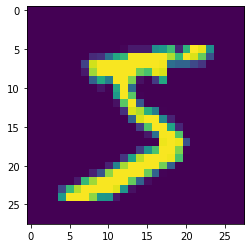

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
np.max(x_train),np.max(x_test)

(1.0, 1.0)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
train_X,valid_X,train_ground,valid_ground = train_test_split(x_train,x_train, test_size=0.3, random_state=123)

In [ ]:
def autoencoder(input_img):
  # #encoder
  model = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
  model = MaxPooling2D((2, 2), padding='same')(model)
  model = Conv2D(4, (3, 3), activation='relu', padding='same')(model)
  encoded = MaxPooling2D((2, 2), padding='same')(model)
   
  # #decoder
  model = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
  model = layers.UpSampling2D((2, 2))(encoded)
  model = Conv2D(8, (3, 3), activation='relu',padding='same')(model)
  model = UpSampling2D((2, 2))(model)
  decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(model)
  return decoded

In [ ]:
input_img = Input(shape = (28,28,1))
optm_adm = Adam(learning_rate=0.01)
optm_RMSprop = Adam(learning_rate=0.01)
optm_SGD = Adam(learning_rate=0.01)
optm = [optm_adm,optm_RMSprop,optm_SGD]

In [ ]:
autoencoder1 = Model(input_img, autoencoder(input_img))
autoencoder1.compile(loss='mean_squared_error', optimizer =optm[0])

In [ ]:
autoencoder1.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 14, 14, 4)         292       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 4)           0         
_________________________________________________________________
up_sampling2d_30 (UpSampling (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 14, 14, 8)         296

In [ ]:
autoencoder_train1 = autoencoder1.fit(train_X, train_ground, batch_size=128,epochs=5,validation_data=(valid_X, valid_ground))

Epoch 1/5
329/329 [==============================] - 37s 113ms/step - loss: 0.0485 - val_loss: 0.0124
Epoch 2/5
329/329 [==============================] - 37s 112ms/step - loss: 0.0119 - val_loss: 0.0111
Epoch 3/5
329/329 [==============================] - 37s 112ms/step - loss: 0.0110 - val_loss: 0.0112
Epoch 4/5
329/329 [==============================] - 37s 112ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 5/5
329/329 [==============================] - 37s 112ms/step - loss: 0.0106 - val_loss: 0.0105


In [ ]:
validation_loss = autoencoder_train1.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.011219850182533265


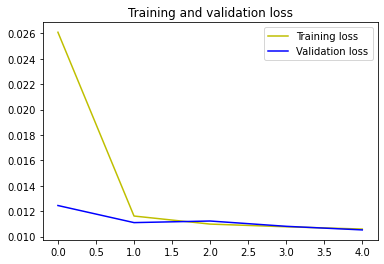

In [ ]:
loss = autoencoder_train1.history['loss']
val_loss = autoencoder_train1.history['val_loss']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred_x1 = autoencoder1.predict(x_test)
pred_x1.shape

(10000, 28, 28, 1)

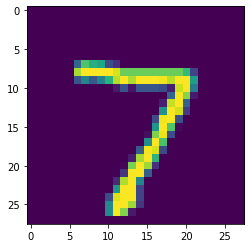

In [ ]:
org_x1=x_test.reshape(10000,28,28)
plt.imshow(org_x1[0])

In [ ]:
pred_x1=pred_x1.reshape(10000,28,28)

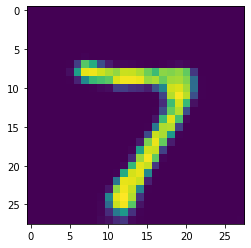

In [ ]:
plt.imshow(pred_x1[0])

# RMSprop optimizer

In [ ]:
autoencoder2 = Model(input_img, autoencoder(input_img))
autoencoder2.compile(loss='binary_crossentropy', optimizer =optm[1])
autoencoder_train2 = autoencoder2.fit(train_X, train_ground, batch_size=128,epochs=5,validation_data=(valid_X, valid_ground))

Epoch 1/5
329/329 [==============================] - 38s 115ms/step - loss: 0.1921 - val_loss: 0.1134
Epoch 2/5
329/329 [==============================] - 38s 114ms/step - loss: 0.1118 - val_loss: 0.1086
Epoch 3/5
329/329 [==============================] - 38s 114ms/step - loss: 0.1079 - val_loss: 0.1064
Epoch 4/5
329/329 [==============================] - 38s 114ms/step - loss: 0.1061 - val_loss: 0.1056
Epoch 5/5
329/329 [==============================] - 38s 114ms/step - loss: 0.1051 - val_loss: 0.1050


In [ ]:
validation_loss = autoencoder_train2.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.10779460072517395


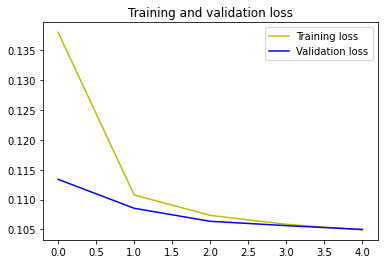

In [ ]:
loss = autoencoder_train2.history['loss']
val_loss = autoencoder_train2.history['val_loss']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

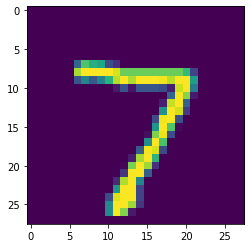

In [ ]:
org_x2=x_test.reshape(10000,28,28)
plt.imshow(org_x2[0])

In [ ]:
pred_x2 = autoencoder2.predict(x_test)
pred_x2.shape

(10000, 28, 28, 1)

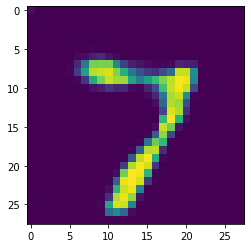

In [ ]:
pred_x2=pred_x2.reshape(10000,28,28)
plt.imshow(pred_x2[0])

# SGD optimizer without momentum

In [ ]:
autoencoder3 = Model(input_img, autoencoder(input_img))
autoencoder3.compile(loss='binary_crossentropy', optimizer =optm[2])
autoencoder_train3 = autoencoder3.fit(train_X, train_ground, batch_size=128,epochs=5,validation_data=(valid_X, valid_ground))

Epoch 1/5
329/329 [==============================] - 39s 115ms/step - loss: 0.1701 - val_loss: 0.0987
Epoch 2/5
329/329 [==============================] - 37s 113ms/step - loss: 0.0945 - val_loss: 0.0924
Epoch 3/5
329/329 [==============================] - 37s 113ms/step - loss: 0.0918 - val_loss: 0.0907
Epoch 4/5
329/329 [==============================] - 37s 113ms/step - loss: 0.0907 - val_loss: 0.0899
Epoch 5/5
329/329 [==============================] - 37s 113ms/step - loss: 0.0893 - val_loss: 0.0888


In [ ]:
validation_loss = autoencoder_train3.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.09211135059595107


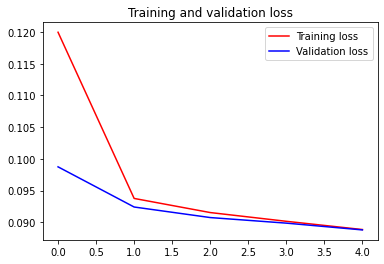

In [ ]:
loss = autoencoder_train3.history['loss']
val_loss = autoencoder_train3.history['val_loss']
epochs = range(5)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

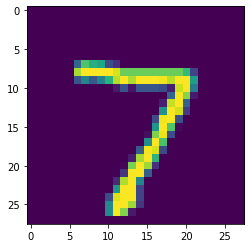

In [ ]:
org_x2=x_test.reshape(10000,28,28)
plt.imshow(org_x2[0])

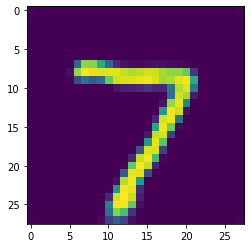

In [ ]:
pred_x3 = autoencoder3.predict(x_test)
pred_x3= pred_x.reshape(10000,28,28)
plt.imshow(pred_x3[0])

In [ ]:
pred_x3.shape

(10000, 28, 28, 1)

# SGD with momentum

In [ ]:
sgd = SGD(lr=0.0001, momentum=0.8, nesterov=True)
autoencoder4 = Model(input_img, autoencoder(input_img))
autoencoder4.compile(loss='mean_squared_error', optimizer =sgd)
autoencoder_train4 = autoencoder4.fit(train_X, train_ground, batch_size=128,epochs=3,validation_data=(valid_X, valid_ground))

Epoch 1/3
329/329 [==============================] - 37s 111ms/step - loss: 0.2206 - val_loss: 0.2142
Epoch 2/3
329/329 [==============================] - 36s 110ms/step - loss: 0.2121 - val_loss: 0.2060
Epoch 3/3
329/329 [==============================] - 36s 110ms/step - loss: 0.2040 - val_loss: 0.1981


In [ ]:
validation_loss = autoencoder_train4.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.20609329640865326


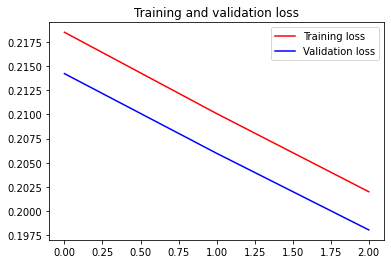

In [ ]:
loss = autoencoder_train4.history['loss']
val_loss = autoencoder_train4.history['val_loss']
epochs = range(3)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred_x4 = autoencoder4.predict(x_test)
pred_x4.shape

(10000, 28, 28, 1)

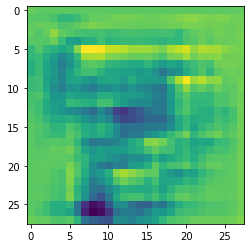

In [ ]:
pred_x4= pred_x4.reshape(10000,28,28)
plt.imshow(pred_x4[0])

# Best model selected on behalf of lowest average validation loss 

In [ ]:
filepath = '/content/sample_data'
autoencoder1.save(filepath=filepath)

INFO:tensorflow:Assets written to: /content/sample_data/assets


# reconstruction loss vs hidden neurons

In [ ]:
input_img = Input(shape = (28,28,1))
def autoencoder(input_img,i):
  # #encoder
  model = Conv2D(2*i, (3, 3), activation='relu', padding='same')(input_img)
  model = MaxPooling2D((2, 2), padding='same')(model)
  model = Conv2D(i, (3, 3), activation='relu', padding='same')(model)
  encoded = MaxPooling2D((2, 2), padding='same')(model)
   
  # #decoder
  model = Conv2D(i, (3, 3), activation='relu', padding='same')(encoded)
  model = layers.UpSampling2D((2, 2))(encoded)
  model = Conv2D(2*i, (3, 3), activation='relu',padding='same')(model)
  model = UpSampling2D((2, 2))(model)
  decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(model)
  return decoded  


In [ ]:
nuron = [2,4,8,16]
optm_adm = Adam(learning_rate=0.01)
avg_train_loss = []
avg_val_loss = []
for i in nuron:
  autoencoder1 = Model(input_img, autoencoder(input_img,i))
  autoencoder1.compile(loss='mean_squared_error', optimizer = optm_adm)
  autoencoder_train1 = autoencoder1.fit(train_X, train_ground, batch_size=128,epochs=3,validation_data=(valid_X, valid_ground)) 
  train_loss = autoencoder_train1.history['loss']
  loss1_= np.mean(np.array(train_loss))
  avg_train_loss.append(loss1_)  
  validation_loss = autoencoder_train1.history['val_loss']
  loss2_= np.mean(np.array(validation_loss))
  avg_val_loss.append(loss2_)   

Epoch 1/3
329/329 [==============================] - 35s 105ms/step - loss: 0.0655 - val_loss: 0.0067
Epoch 2/3
329/329 [==============================] - 34s 104ms/step - loss: 0.0158 - val_loss: 0.0063
Epoch 3/3
329/329 [==============================] - 34s 105ms/step - loss: 0.0146 - val_loss: 0.0061
Epoch 1/3
329/329 [==============================] - 40s 122ms/step - loss: 0.0307 - val_loss: 0.0038
Epoch 2/3
329/329 [==============================] - 39s 119ms/step - loss: 0.0089 - val_loss: 0.0035
Epoch 3/3
329/329 [==============================] - 39s 119ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 1/3
329/329 [==============================] - 55s 165ms/step - loss: 0.0326 - val_loss: 0.0043
Epoch 2/3
329/329 [==============================] - 53s 162ms/step - loss: 0.0077 - val_loss: 0.0033
Epoch 3/3
329/329 [==============================] - 53s 161ms/step - loss: 0.0065 - val_loss: 0.0035
Epoch 1/3
329/329 [==============================] - 95s 288ms/step - loss: 0.1148

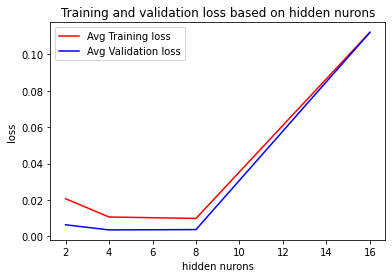

In [ ]:
plt.figure()
plt.plot(nuron,avg_train_loss, 'r', label='Avg Training loss')
plt.plot(nuron, avg_val_loss, 'b', label='Avg Validation loss')
plt.title('Training and validation loss based on hidden nurons')
plt.xlabel('hidden nurons')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
nuron = [2,4,8,16]
optm_SGD = Adam(learning_rate=0.01)
avg_train_loss = []
avg_val_loss = []
for i in nuron:
  autoencoder1 = Model(input_img, autoencoder(input_img))
  autoencoder1.compile(loss='mean_squared_error', optimizer = optm_SGD)
  autoencoder_train1 = autoencoder1.fit(train_X, train_ground, batch_size=128,epochs=3,validation_data=(valid_X, valid_ground)) 
  train_loss = autoencoder_train1.history['loss']
  loss1_= np.mean(np.array(train_loss))
  avg_train_loss.append(loss1_)  
  validation_loss = autoencoder_train1.history['val_loss']
  loss2_= np.mean(np.array(validation_loss))
  avg_val_loss.append(loss2_) 

Epoch 1/3
329/329 [==============================] - 35s 105ms/step - loss: 0.0697 - val_loss: 0.0081
Epoch 2/3
329/329 [==============================] - 34s 105ms/step - loss: 0.0176 - val_loss: 0.0069
Epoch 3/3
329/329 [==============================] - 34s 105ms/step - loss: 0.0145 - val_loss: 0.0058
Epoch 1/3
329/329 [==============================] - 41s 122ms/step - loss: 0.0523 - val_loss: 0.0075
Epoch 2/3
329/329 [==============================] - 39s 119ms/step - loss: 0.0134 - val_loss: 0.0063
Epoch 3/3
329/329 [==============================] - 39s 119ms/step - loss: 0.0124 - val_loss: 0.0058
Epoch 1/3
329/329 [==============================] - 54s 164ms/step - loss: 0.0308 - val_loss: 0.0038
Epoch 2/3
329/329 [==============================] - 53s 162ms/step - loss: 0.0077 - val_loss: 0.0035
Epoch 3/3
329/329 [==============================] - 53s 162ms/step - loss: 0.0070 - val_loss: 0.0033
Epoch 1/3
329/329 [==============================] - 95s 286ms/step - loss: 0.1142

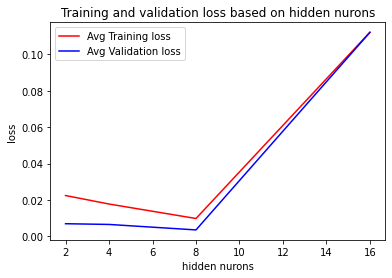

In [ ]:
plt.figure()
plt.plot(nuron,avg_train_loss, 'r', label='Avg Training loss')
plt.plot(nuron, avg_val_loss, 'b', label='Avg Validation loss')
plt.title('Training and validation loss based on hidden nurons')
plt.xlabel('hidden nurons')
plt.ylabel('loss')
plt.legend()
plt.show()

# PCA reconstruction and compare with the Autoencoder reconstruction using test reconstruction loss.

In [24]:
from sklearn.decomposition import PCA

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

pca = PCA(n_components = 49)
trainX = x_train.reshape(60000,784)
testX = x_test.reshape(10000,784)

trainX = trainX /255
testX = testX /255

pca.fit(trainX)
trainX1 = pca.transform(trainX)
pca.fit(testX)
testX1 = pca.transform(testX)
print(trainX1.shape,testX1.shape)

(60000, 49) (10000, 49)


In [25]:
X_test = pca.inverse_transform(testX1)
X_train = pca.inverse_transform(trainX1)
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


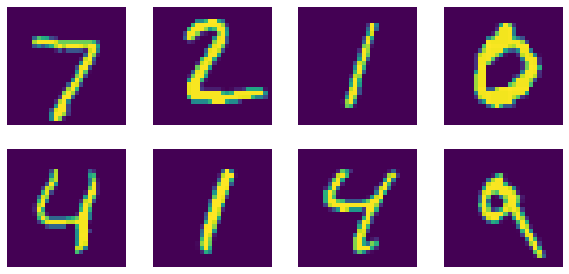

In [26]:
x_test = x_test.reshape(10000,28,28)
plt.figure(figsize=(10,10))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(x_test[i])

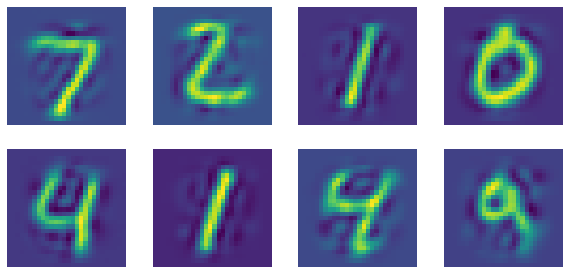

In [27]:
X_test = X_test.reshape(10000,28,28)
plt.figure(figsize=(10,10))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(X_test[i])

In [31]:
from sklearn.metrics import mean_squared_error

loss_=mean_squared_error(x_test.reshape(10000,784), X_test.reshape(10000,784))
np.sqrt(loss_)

85.77881894583712

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(x_test.reshape(10000,784), X_test.reshape(10000,784))

33.69301238748139

from the nueron vs loss graph we see that minimum loss occured in case of 8 nuron in input layer ,, so in that case we get the best model

# Q3 part 2

## save best model for further use in que 3 part2 

In [ ]:
input_img = Input(shape = (28,28,1))
def autoencoder(input_img):
  # #encoder
  model = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
  model = MaxPooling2D((2, 2), padding='same')(model)
  model = Conv2D(4, (3, 3), activation='relu', padding='same')(model)
  encoded = MaxPooling2D((2, 2), padding='same')(model)
   
  # #decoder
  model = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
  model = layers.UpSampling2D((2, 2))(encoded)
  model = Conv2D(8, (3, 3), activation='relu',padding='same')(model)
  model = UpSampling2D((2, 2))(model)
  decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(model)
  return decoded
  
autoenCoder = Model(input_img, autoencoder(input_img))
autoenCoder.compile(loss='mean_squared_error', optimizer ='Adam')
autoencoder_train = autoenCoder.fit(train_X, train_ground,batch_size=128,epochs=5,validation_data=(valid_X, valid_ground))

Epoch 1/5
329/329 [==============================] - 37s 111ms/step - loss: 0.1090 - val_loss: 0.0178
Epoch 2/5
329/329 [==============================] - 36s 111ms/step - loss: 0.0163 - val_loss: 0.0125
Epoch 3/5
329/329 [==============================] - 36s 110ms/step - loss: 0.0118 - val_loss: 0.0104
Epoch 4/5
329/329 [==============================] - 36s 111ms/step - loss: 0.0101 - val_loss: 0.0096
Epoch 5/5
329/329 [==============================] - 36s 111ms/step - loss: 0.0092 - val_loss: 0.0088


In [ ]:
filepath='/content/sample_data'
autoenCoder.save(filepath=filepath)

INFO:tensorflow:Assets written to: /content/sample_data/assets


In [ ]:
#download data set
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# convert data in range 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0

#reshape data for mlp input
x_train = x_train.reshape(60000,784)

train_X,val_X,train_y,val_y = train_test_split(x_train,y_train, test_size=0.3, random_state=123)

train_labels = tf.keras.utils.to_categorical(train_y)
val_labels = tf.keras.utils.to_categorical(val_y)
test_labels = tf.keras.utils.to_categorical(y_test)

In [ ]:
train_X.shape,train_y.shape,val_X.shape,val_y.shape

((42000, 784), (42000,), (18000, 784), (18000,))

In [ ]:
model1 = models.Sequential()
model1.add(Dense(128, activation='relu',input_dim=784))
model1.add(Dropout(0.3))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation='softmax'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model1.fit(train_X, train_labels, batch_size=128,epochs=5,validation_data=(val_X, val_labels))

Epoch 1/5
329/329 [==============================] - 2s 5ms/step - loss: 0.8821 - accuracy: 0.7257 - val_loss: 0.2131 - val_accuracy: 0.9323
Epoch 2/5
329/329 [==============================] - 2s 5ms/step - loss: 0.2460 - accuracy: 0.9276 - val_loss: 0.1435 - val_accuracy: 0.9556
Epoch 3/5
329/329 [==============================] - 2s 5ms/step - loss: 0.1909 - accuracy: 0.9421 - val_loss: 0.1227 - val_accuracy: 0.9622
Epoch 4/5
329/329 [==============================] - 2s 5ms/step - loss: 0.1483 - accuracy: 0.9549 - val_loss: 0.1068 - val_accuracy: 0.9678
Epoch 5/5
329/329 [==============================] - 2s 5ms/step - loss: 0.1314 - accuracy: 0.9596 - val_loss: 0.1007 - val_accuracy: 0.9690


In [ ]:
filepath = '/content/sample_data'
autoenCoder = models.load_model(filepath=filepath)

In [ ]:
pred_x = autoenCoder.predict(x_test)
pred_x.shape

(10000, 28, 28, 1)

In [ ]:
pred_x = pred_x.reshape(10000,784)
pred_x.shape

(10000, 784)

In [ ]:
cnn_results = model1.evaluate(pred_x,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1519 - accuracy: 0.9503


Getting accuracy using autoencoder+ mlp = 95.03

Getting accuracy using normal mlp = 96.90


aprroxmately in both case ,found same accuracy because given dataset are not like noise data ,, is dataset are noisy then in this case we get better result if reconsruct feature data using autoencoder after that apply cnn or mlp